In [1]:
#adding the dependencies in the start of the notebook
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

In [2]:
df = pd.read_csv('instagram.csv')
df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [4]:
df.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [5]:
# checking once again if there are any null values
df.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [6]:
# Print the names of all features
feature_names = df.columns
print("Feature Names:")
print(feature_names)

Feature Names:
Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')


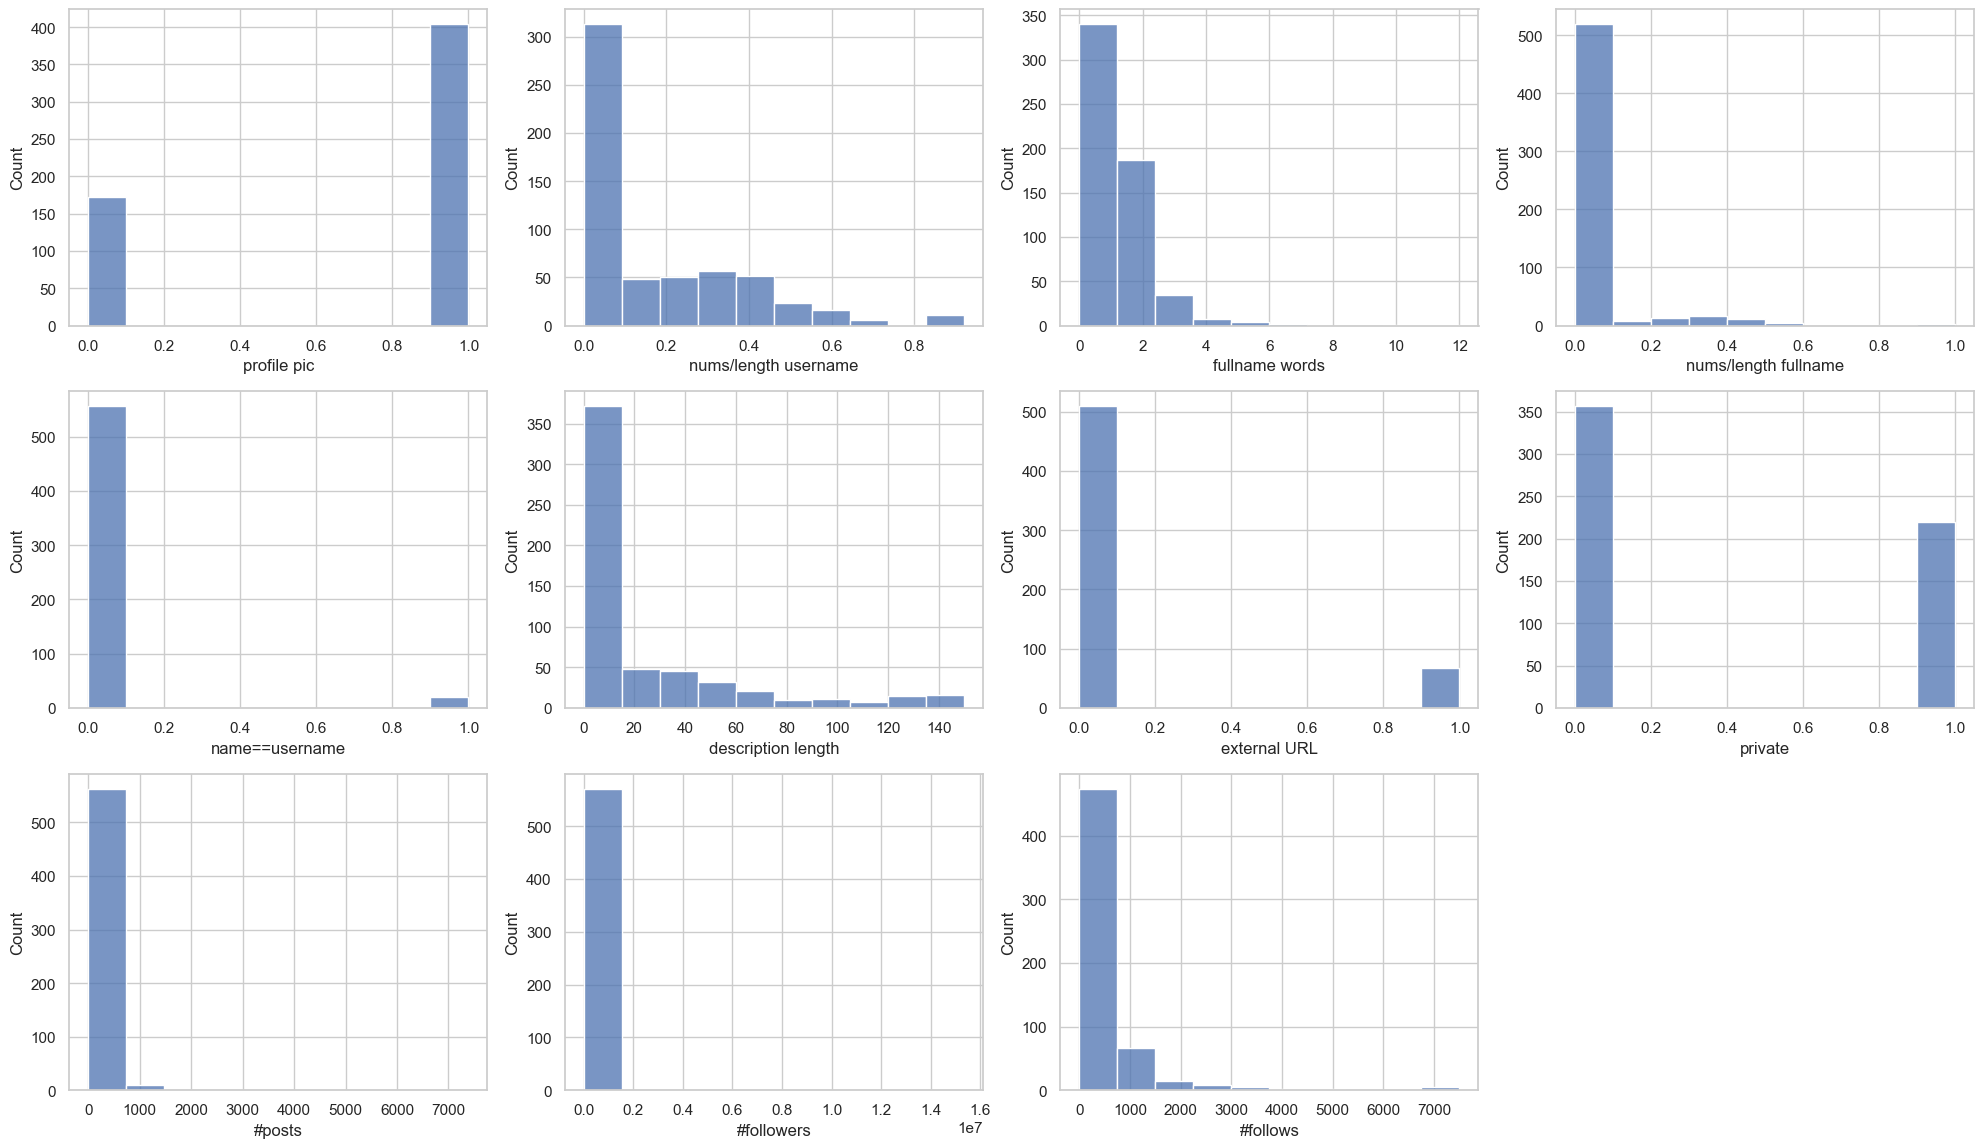

In [7]:
# Set the style of seaborn plot
sns.set(style="whitegrid")

# List of features
features = ['profile pic', 'nums/length username', 'fullname words', 'nums/length fullname', 'name==username',
            'description length', 'external URL', 'private', '#posts', '#followers', '#follows']

# Plot histograms for each feature
plt.figure(figsize=(20,15))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[feature], kde=False, bins=10
                )
plt.tight_layout()
plt.show()

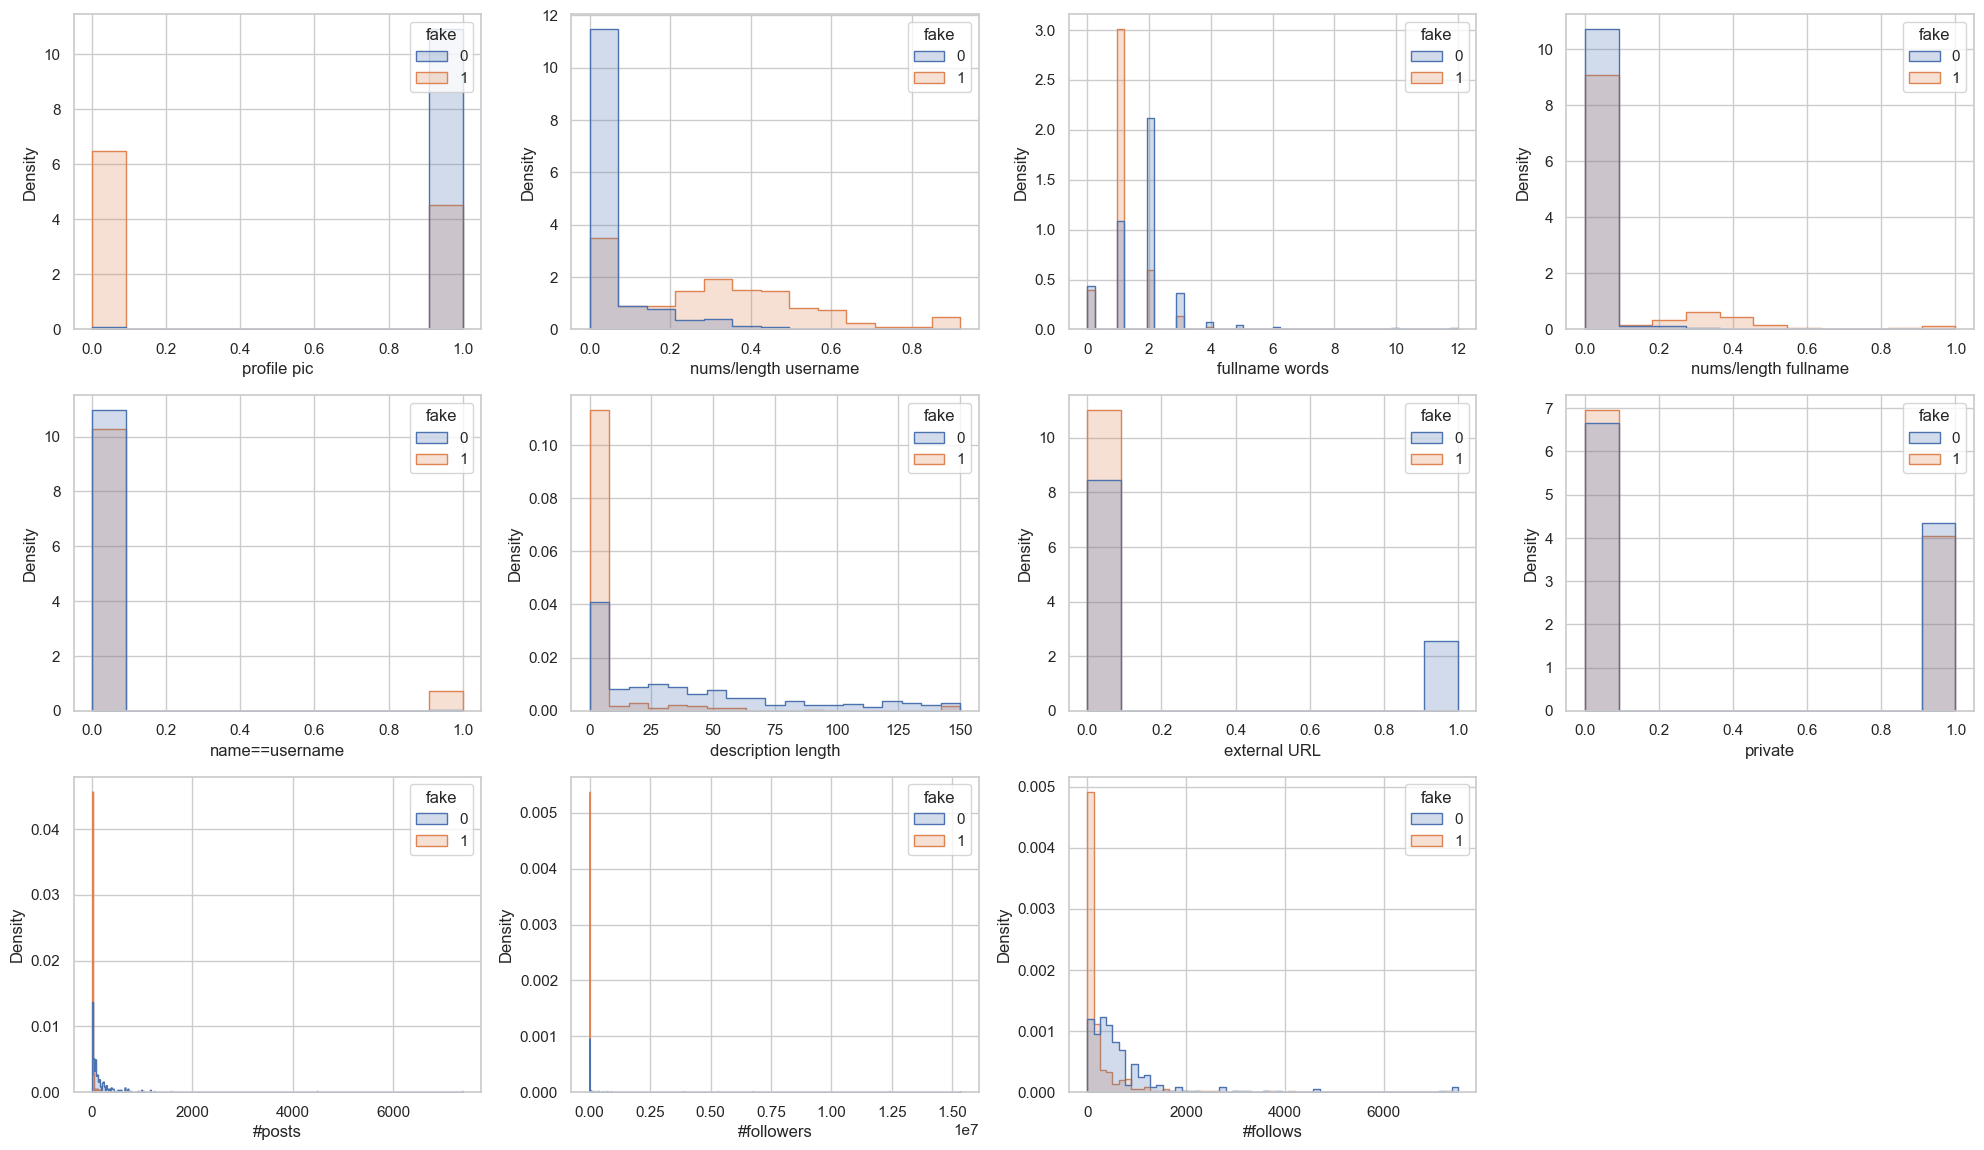

In [8]:
# Plot the distribution of each feature with respect to the target variable 'fake'
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.histplot(data=df, x=feature, hue='fake', element="step", stat="density", common_norm=False)
plt.tight_layout()
plt.show()

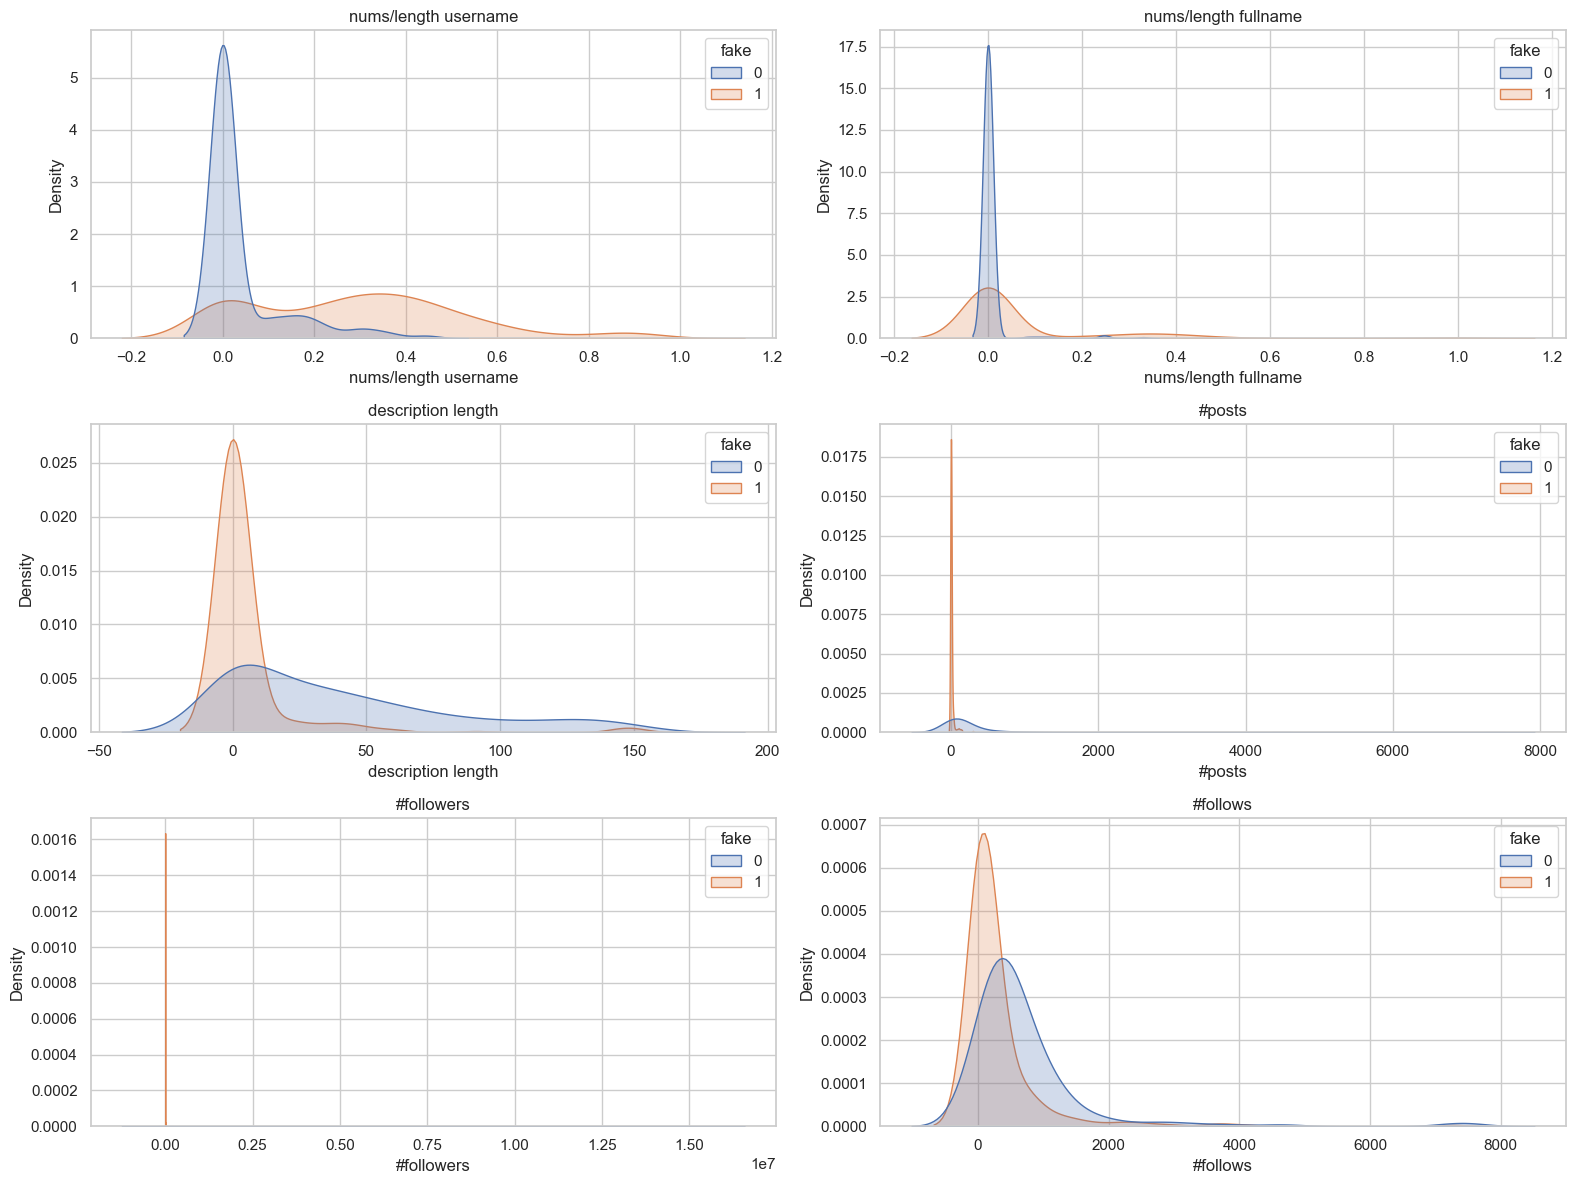

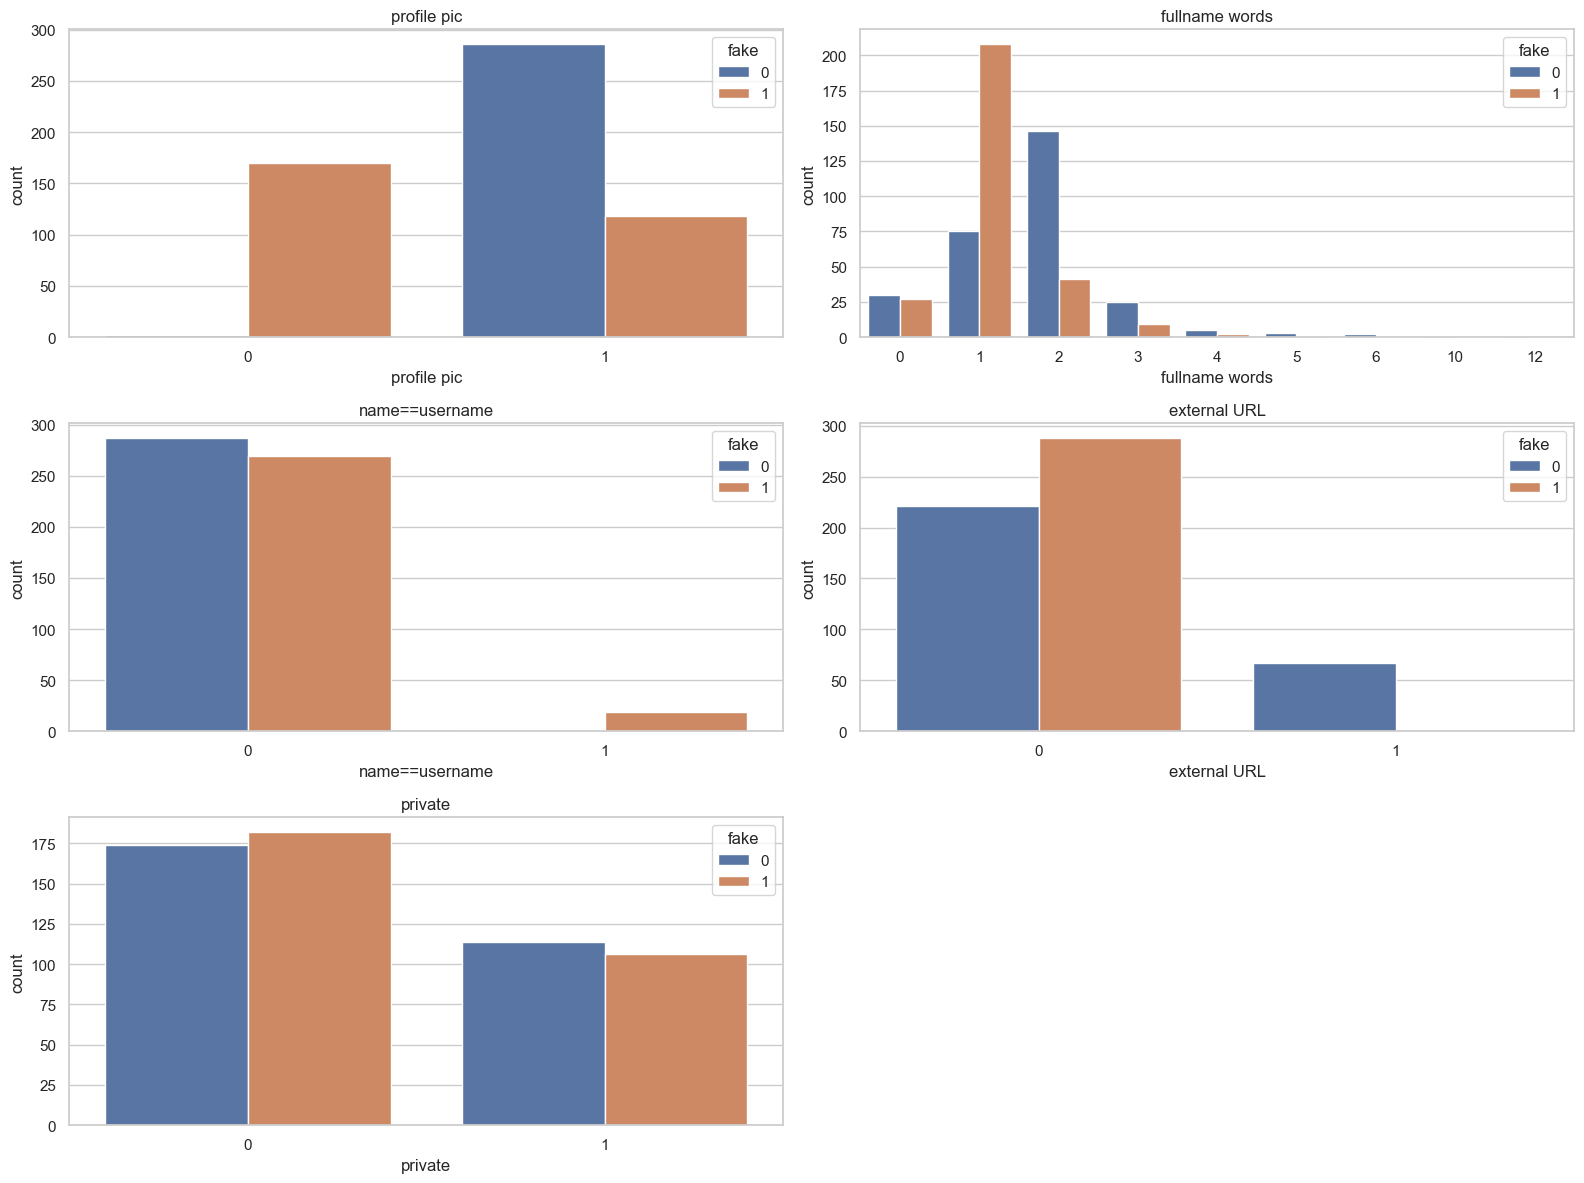

In [9]:
# Define the features as either continuous or categorical based on the number of unique values
continuous_features = [f for f in features if df[f].nunique() > 10]
categorical_features = [f for f in features if df[f].nunique() <= 10]

# Plot KDE plots for each continuous feature
plt.figure(figsize=(16, 12))
for i, feature in enumerate(continuous_features):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(data=df, x=feature, hue="fake", fill=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Plot bar plots for each categorical feature
plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=feature, hue="fake")
    plt.title(feature)
plt.tight_layout()
plt.show()

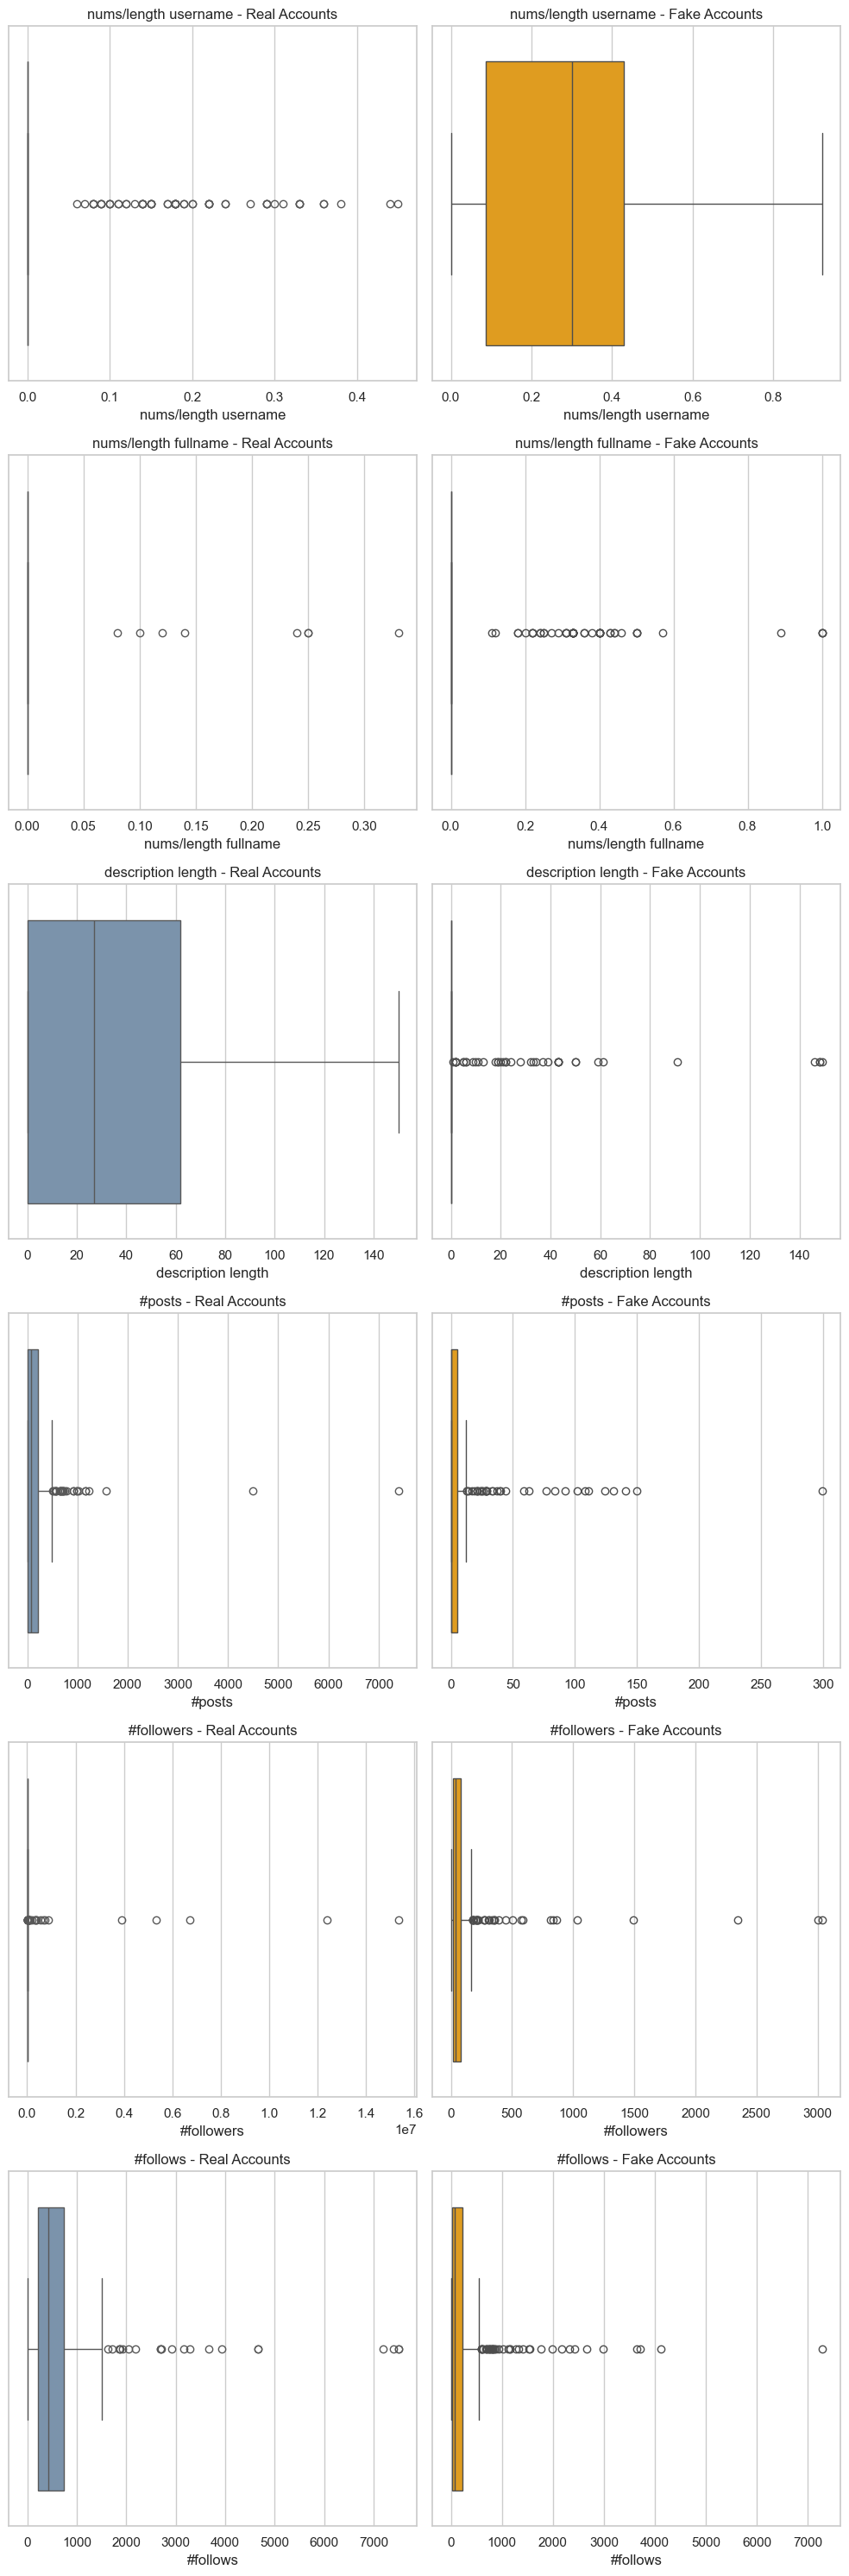

In [10]:
# Plotting Boxplots
fig, axes = plt.subplots(nrows=len(continuous_features), ncols=2, figsize=(10, 30))

for i, col in enumerate(continuous_features):
    sns.boxplot(data=df[df['fake'] == 0], x=col, ax=axes[i, 0], color = '#7393B3')
    sns.boxplot(data=df[df['fake'] == 1], x=col, ax=axes[i, 1], color = 'orange')
    axes[i, 0].set_title(col + " - Real Accounts")
    axes[i, 1].set_title(col + " - Fake Accounts")

plt.tight_layout()
plt.show()

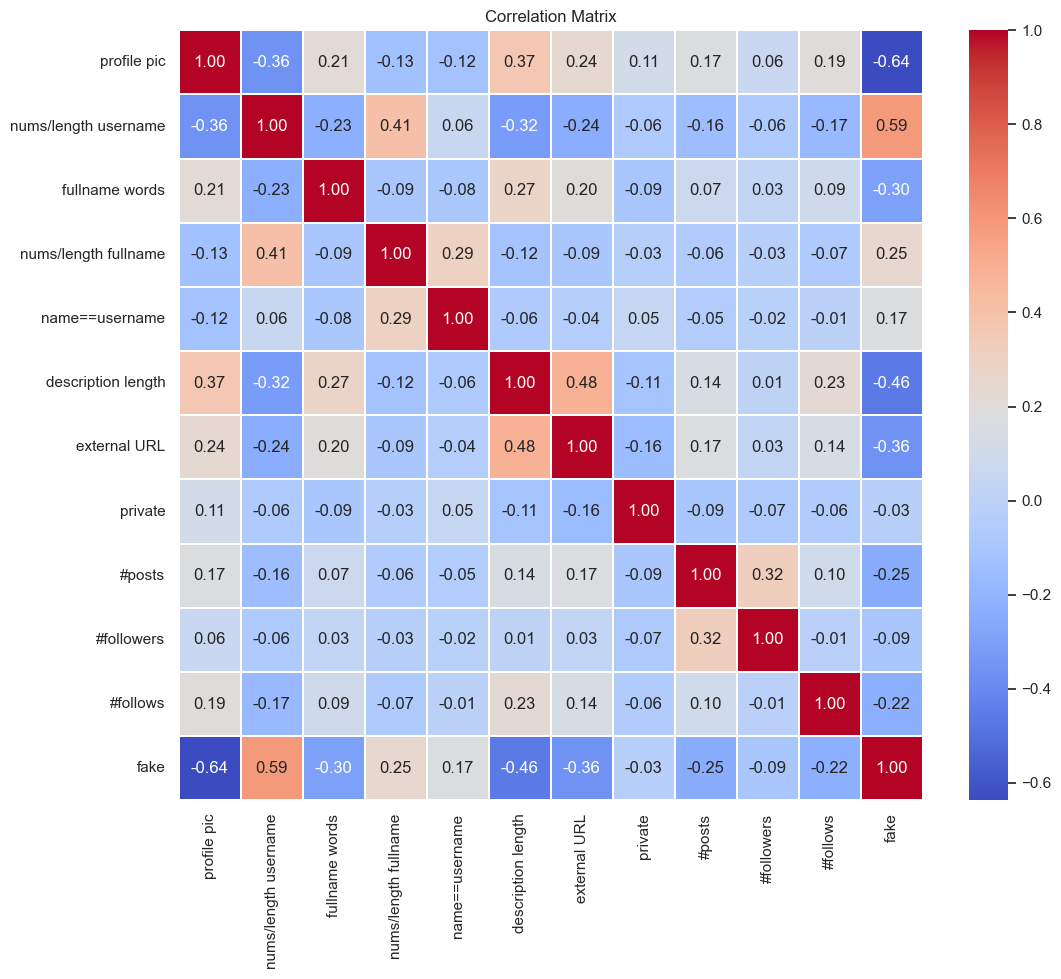

In [11]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.1)
plt.title("Correlation Matrix")
plt.show()

# Adding new Features to the data 


### Engagement Ratio 


In [12]:
data = df
# 1. Calculate Engagement Ratio: Ratio of followers_count to statuses_count
# Description: The engagement ratio represents the ratio of followers_count to statuses_count. 
#It indicates the level of engagement per post.
data['engagement_ratio'] = data['#followers'] / data['#posts']

### Social Interaction Index

In [13]:
# 2. Calculate Social Interaction Index: Sum of friends_count, followers_count, and favourites_count
# Description: The social interaction index captures the overall level of social interaction and activity of a profile.
data['social_interaction_index'] = data['#followers'] + data['#follows'] + data['#posts']

### Profile Completeness Score

In [14]:
# 3. Calculate Profile Completeness Score: Presence of profile image, external URL, and description
# Description: The profile completeness score assesses the completeness of profile information, including the presence of a URL, profile image, and bio.
data['profile_completeness_score'] = (data['profile pic'] + data['external URL'] + (data['description length'] > 0)).astype(int)

### Textual Complexity of Description

In [15]:
# 4. Calculate Textual Complexity of Description: Average word length of description
# Description: The average description word length represents the complexity or sophistication of the profile description.
data['avg_description_word_length'] = data['description length'].apply(lambda x: len(str(x).split()) / len(str(x).split()) if x else 0)

In [16]:
data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,engagement_ratio,social_interaction_index,profile_completeness_score,avg_description_word_length
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0,31.250000,1987,2,1.0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0,9.580420,3559,2,1.0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0,12.230769,270,1,0.0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0,0.609720,1744,2,1.0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0,25.166667,283,1,0.0


In [17]:
data['engagement_ratio']

0      31.250000
1       9.580420
2      12.230769
3       0.609720
4      25.166667
         ...    
571     5.030303
572     1.500000
573    24.000000
574          inf
575    75.000000
Name: engagement_ratio, Length: 576, dtype: float64

In [18]:
import numpy as np

# Step 1: Replace infinite values with NaN
data['engagement_ratio'] = data['engagement_ratio'].replace([np.inf, -np.inf], np.nan)

# Step 2: Convert the column to a numeric type (float)
data['engagement_ratio'] = pd.to_numeric(data['engagement_ratio'], errors='coerce')

# Step 3: Replace NaN values with the mean of the column
mean_engagement_ratio = data['engagement_ratio'].mean()
data['engagement_ratio'].fillna(mean_engagement_ratio, inplace=True)

# Check the data types to confirm the conversion
print(data.dtypes)


profile pic                      int64
nums/length username           float64
fullname words                   int64
nums/length fullname           float64
name==username                   int64
description length               int64
external URL                     int64
private                          int64
#posts                           int64
#followers                       int64
#follows                         int64
fake                             int64
engagement_ratio               float64
social_interaction_index         int64
profile_completeness_score       int32
avg_description_word_length    float64
dtype: object


In [19]:
data['engagement_ratio']

0       31.250000
1        9.580420
2       12.230769
3        0.609720
4       25.166667
          ...    
571      5.030303
572      1.500000
573     24.000000
574    477.601163
575     75.000000
Name: engagement_ratio, Length: 576, dtype: float64

In [20]:
import plotly.express as px

# Assuming 'df' is your DataFrame
fig = px.pie(df, names='fake', title='Target variable distribution', color_discrete_sequence=['#636EFA', '#EF553B'])
fig.update_layout(template='ggplot2')
fig.show()


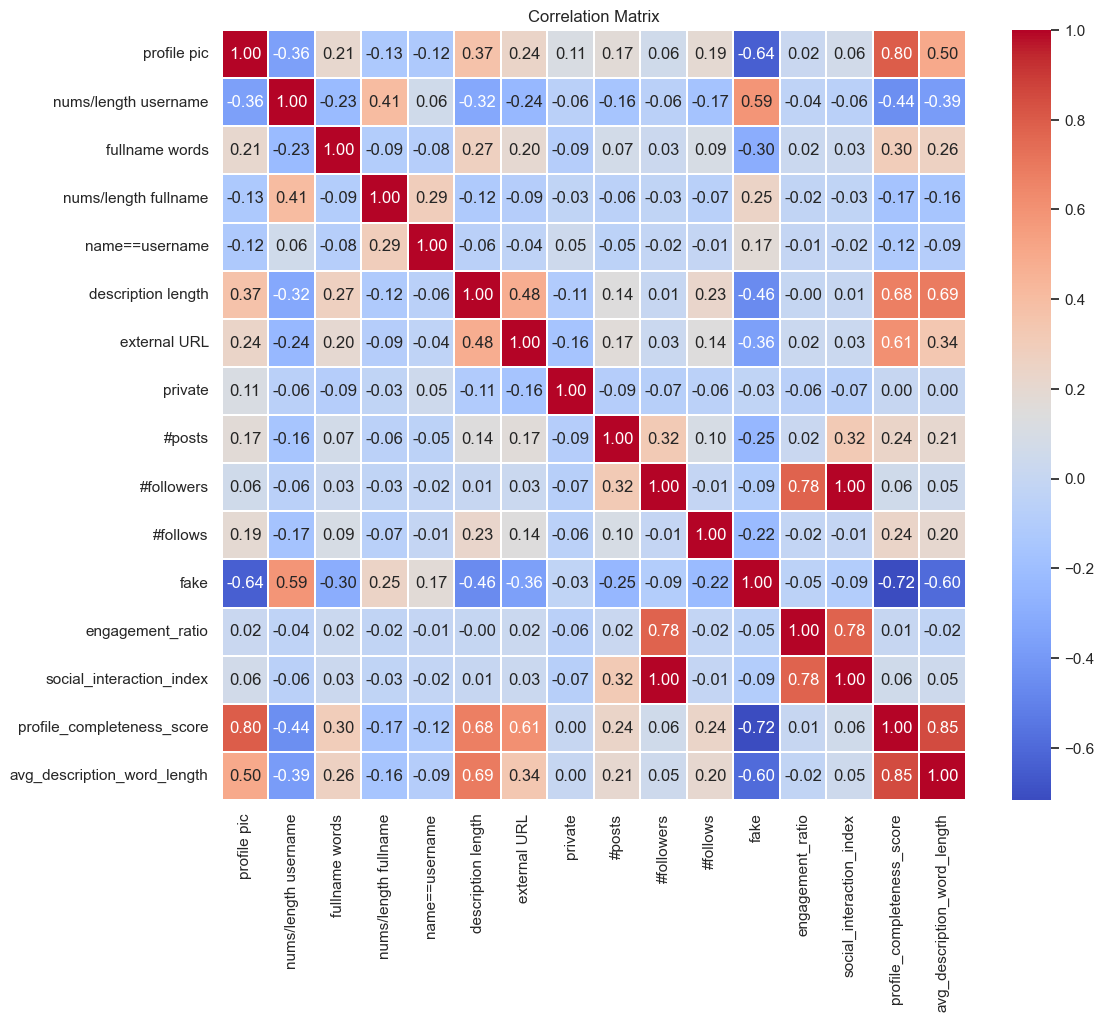

In [21]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.1)
plt.title("Correlation Matrix")
plt.show()

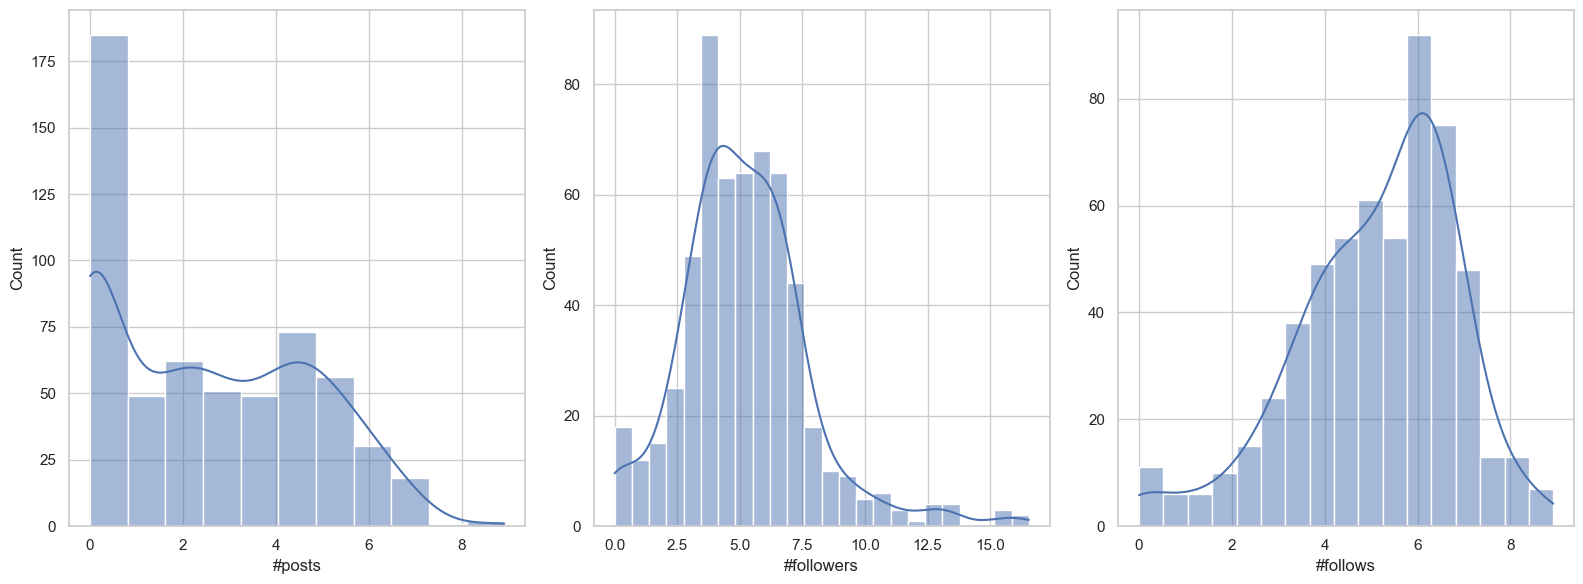

In [22]:
#addressing the outliers
features_with_outliers = ['#posts', '#followers', '#follows']

for feature in features_with_outliers:
    data[feature] = np.log1p(data[feature])

# Visualize the transformed features
plt.figure(figsize=(16, 6))
for i, feature in enumerate(features_with_outliers):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=data, x=feature, kde=True)
plt.tight_layout()
plt.show()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   profile pic                  576 non-null    int64  
 1   nums/length username         576 non-null    float64
 2   fullname words               576 non-null    int64  
 3   nums/length fullname         576 non-null    float64
 4   name==username               576 non-null    int64  
 5   description length           576 non-null    int64  
 6   external URL                 576 non-null    int64  
 7   private                      576 non-null    int64  
 8   #posts                       576 non-null    float64
 9   #followers                   576 non-null    float64
 10  #follows                     576 non-null    float64
 11  fake                         576 non-null    int64  
 12  engagement_ratio             576 non-null    float64
 13  social_interaction_i

In [24]:
data[['engagement_ratio', 'social_interaction_index', 'avg_description_word_length','profile_completeness_score']].describe()


,engagement_ratio,social_interaction_index,avg_description_word_length,profile_completeness_score
count,576.000000,5.760000e+02,576.000000,576.000000
mean,477.601163,8.592311e+04,0.434028,1.251736
std,4550.423585,9.102681e+05,0.496059,0.982011
min,0.000000,0.000000e+00,0.000000,0.000000
25%,6.081802,1.070000e+02,0.000000,0.000000
50%,24.111111,4.940000e+02,0.000000,1.000000
75%,477.601163,1.658750e+03,1.000000,2.000000
max,103638.770270,1.533875e+07,1.000000,3.000000


In [25]:
#adding features in X and the target variable in y
X = data.drop('fake', axis=1)
y = data['fake']

In [26]:
#adding the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
#Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [28]:
#Define the models in a for loop
models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state = 42),
    "Random Forest" : RandomForestClassifier(random_state = 42),
    "Support Vector Machine" : SVC(random_state = 42)
}

In [29]:
# Initiating dictionary to hold the results for each model
results = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [30]:
#For each model, running a for loop
for model_name, model in models.items():
    #train the model
    model.fit(X_train, y_train)

    #Make predictions using the test set
    y_pred = model.predict(X_test)

    #Calculating the performance metrics:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    #results of the model
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1 Score"].append(f1)

#converting the results into dataframe for easier viewing
results_df = pd.DataFrame(results)
print(results_df)

                    Model  Accuracy  Precision    Recall  F1 Score
0       Gradient Boosting  0.913793   0.921569  0.886792  0.903846
1           Random Forest  0.913793   0.905660  0.905660  0.905660
2  Support Vector Machine  0.922414   0.940000  0.886792  0.912621


In [31]:
for model_name, model in models.items():
    # Calculate the accuracy on the training set
    train_accuracy = accuracy_score(y_train, model.predict(X_train))

    # Calculate the accuracy on the test set
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f"{model_name}:")
    print(f"Training set accuracy: {train_accuracy}")
    print(f"Test set accuracy: {test_accuracy}\n")

Gradient Boosting:
Training set accuracy: 1.0
Test set accuracy: 0.9224137931034483

Random Forest:
Training set accuracy: 1.0
Test set accuracy: 0.9224137931034483

Support Vector Machine:
Training set accuracy: 0.9478260869565217
Test set accuracy: 0.9224137931034483



In [32]:
# For each model, running a for loop
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions using the test set
    y_pred = model.predict(X_test)

    # Calculating the performance metrics:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Results of the model
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1 Score"].append(f1)

    # Print results for individual models
    print(f"{model_name}:")
    print(f"Test set accuracy: {accuracy}\n")

# Converting the results into a DataFrame for easier viewing
results_df = pd.DataFrame(results)
print("Results for Individual Models:")
print(results_df)


# Ensemble Voting Classifier
model_list = [(model_name, model) for model_name, model in models.items()]

# Initialize a VotingClassifier with the models
voting_classifier = VotingClassifier(estimators=model_list, voting='hard')

# Train the ensemble model
voting_classifier.fit(X_train, y_train)

# Make predictions using the training set
y_train_pred_ensemble = voting_classifier.predict(X_train)

# Calculate the training accuracy for the ensemble model
train_accuracy_ensemble = accuracy_score(y_train, y_train_pred_ensemble)

# Make predictions using the test set
y_test_pred_ensemble = voting_classifier.predict(X_test)

# Calculate the test accuracy for the ensemble model
test_accuracy_ensemble = accuracy_score(y_test, y_test_pred_ensemble)

# Print the results for the ensemble model
print("Ensemble Model:")
print(f"Training set accuracy: {train_accuracy_ensemble}")
print(f"Test set accuracy: {test_accuracy_ensemble}")


Gradient Boosting:
Test set accuracy: 0.9137931034482759

Random Forest:
Test set accuracy: 0.9137931034482759

Support Vector Machine:
Test set accuracy: 0.9224137931034483

Results for Individual Models:
                    Model  Accuracy  Precision    Recall  F1 Score
0       Gradient Boosting  0.913793   0.921569  0.886792  0.903846
1           Random Forest  0.913793   0.905660  0.905660  0.905660
2  Support Vector Machine  0.922414   0.940000  0.886792  0.912621
3       Gradient Boosting  0.913793   0.921569  0.886792  0.903846
4           Random Forest  0.913793   0.905660  0.905660  0.905660
5  Support Vector Machine  0.922414   0.940000  0.886792  0.912621
Ensemble Model:
Training set accuracy: 1.0
Test set accuracy: 0.9310344827586207


In [33]:
import pickle

# Assuming you have trained the 'voting_classifier' ensemble model
# and you want to save it to a file named 'ensemble_model.pkl'

# Save the ensemble model to a pickle file
with open('ensemble_model.pkl', 'wb') as f:
    pickle.dump(voting_classifier, f)


## Trying new Ways


In [34]:
X1 = data.drop(['engagement_ratio', 'social_interaction_index', 'avg_description_word_length','profile_completeness_score', 'fake'], axis=1)

In [35]:
# Split the data into a training set and a test set
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)


# Standardize the features
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)


#For each model, running a for loop
for model_name, model in models.items():
    #train the model
    model.fit(X1_train, y_train)

    #Make predictions using the test set
    y_pred = model.predict(X1_test)

    #Calculating the performance metrics:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    #results of the model
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1 Score"].append(f1)

#converting the results into dataframe for easier viewing
results_df = pd.DataFrame(results)
print(results_df)

                    Model  Accuracy  Precision    Recall  F1 Score
0       Gradient Boosting  0.913793   0.921569  0.886792  0.903846
1           Random Forest  0.913793   0.905660  0.905660  0.905660
2  Support Vector Machine  0.922414   0.940000  0.886792  0.912621
3       Gradient Boosting  0.913793   0.921569  0.886792  0.903846
4           Random Forest  0.913793   0.905660  0.905660  0.905660
5  Support Vector Machine  0.922414   0.940000  0.886792  0.912621
6       Gradient Boosting  0.913793   0.938776  0.867925  0.901961
7           Random Forest  0.913793   0.938776  0.867925  0.901961
8  Support Vector Machine  0.905172   0.977273  0.811321  0.886598


In [36]:
for model_name, model in models.items():
    # Calculate the accuracy on the training set
    train_accuracy = accuracy_score(y_train, model.predict(X1_train))

    # Calculate the accuracy on the test set
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f"{model_name}:")
    print(f"Training set accuracy: {train_accuracy}")
    print(f"Test set accuracy: {test_accuracy}\n")

Gradient Boosting:
Training set accuracy: 0.9978260869565218
Test set accuracy: 0.9051724137931034

Random Forest:
Training set accuracy: 0.9978260869565218
Test set accuracy: 0.9051724137931034

Support Vector Machine:
Training set accuracy: 0.95
Test set accuracy: 0.9051724137931034



In [37]:
# Use X_train and X_test for training and testing
for model_name, model in models.items():
    # Train the model
    model.fit(X1_train, y_train)

    # Make predictions using the test set
    y_pred = model.predict(X1_test)

    # Calculating the performance metrics:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Results of the model
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1 Score"].append(f1)

    # Print results for individual models
    print(f"{model_name}:")
    print(f"Test set accuracy: {accuracy}")
    print(f"Test set precision: {precision}")
    print(f"Test set recall: {recall}")
    print(f"Test set F1 Score: {f1}\n")

# Converting the results into a DataFrame for easier viewing
results_df = pd.DataFrame(results)
print("Results for Individual Models:")
print(results_df)

# ... (previous code)

# Ensemble Voting Classifier
model_list = [(model_name, model) for model_name, model in models.items()]

# Initialize a VotingClassifier with the models
voting_classifier = VotingClassifier(estimators=model_list, voting='hard')

# Train the ensemble model
voting_classifier.fit(X1_train, y_train)

# Make predictions using the training set
y_train_pred_ensemble = voting_classifier.predict(X1_train)

# Calculate the training accuracy for the ensemble model
train_accuracy_ensemble = accuracy_score(y_train, y_train_pred_ensemble)

# Make predictions using the test set
y_test_pred_ensemble = voting_classifier.predict(X1_test)

# Calculate the test accuracy for the ensemble model
test_accuracy_ensemble = accuracy_score(y_test, y_test_pred_ensemble)

# Print the results for the ensemble model
print("Ensemble Model:")
print(f"Training set accuracy: {train_accuracy_ensemble}")
print(f"Test set accuracy: {test_accuracy_ensemble}")


Gradient Boosting:
Test set accuracy: 0.9137931034482759
Test set precision: 0.9387755102040817
Test set recall: 0.8679245283018868
Test set F1 Score: 0.9019607843137256

Random Forest:
Test set accuracy: 0.9137931034482759
Test set precision: 0.9387755102040817
Test set recall: 0.8679245283018868
Test set F1 Score: 0.9019607843137256

Support Vector Machine:
Test set accuracy: 0.9051724137931034
Test set precision: 0.9772727272727273
Test set recall: 0.8113207547169812
Test set F1 Score: 0.88659793814433

Results for Individual Models:
                     Model  Accuracy  Precision    Recall  F1 Score
0        Gradient Boosting  0.913793   0.921569  0.886792  0.903846
1            Random Forest  0.913793   0.905660  0.905660  0.905660
2   Support Vector Machine  0.922414   0.940000  0.886792  0.912621
3        Gradient Boosting  0.913793   0.921569  0.886792  0.903846
4            Random Forest  0.913793   0.905660  0.905660  0.905660
5   Support Vector Machine  0.922414   0.940000  